# Plot of shot types over all teams in a season

In [205]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [206]:
from ift6758.data.data_acquisition import Season
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json 

#### I chose 2019 because I didn't dl it yet and it is noted as the best season of the decade from this [link](https://champsorchumps.us/records/best-nhl-regular-season-records)

In [207]:
from  ift6758.data.data_acquisition import Season
season2019 = Season(2019,"../ift6758/data")
df = season2019.clean_data()
df.head()

File already Exists, loading from ../ift6758/data/PICKLE//2019_clean.pkl


,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie
0,Shot,2019010001,Vegas Golden Knights,1,00:52,REGULAR,19:08,-34.0,19.0,Wrist Shot,NaN,NaN,Reilly Smith,Adin Hill
1,Shot,2019010001,Arizona Coyotes,1,01:12,REGULAR,18:48,67.0,-15.0,Snap Shot,NaN,NaN,Robbie Russo,Malcolm Subban
2,Shot,2019010001,Vegas Golden Knights,1,01:46,REGULAR,18:14,-36.0,32.0,Snap Shot,NaN,NaN,Zach Whitecloud,Adin Hill
3,Goal,2019010001,Arizona Coyotes,1,04:00,REGULAR,16:00,42.0,-19.0,Snap Shot,False,Even,Ilya Lyubushkin,Malcolm Subban
4,Goal,2019010001,Vegas Golden Knights,1,04:39,REGULAR,15:21,-71.0,-3.0,Wrist Shot,False,Even,Max Pacioretty,Adin Hill


In [208]:
df.head()
df['count'] = df['result.event']
df_g = df[['result.event','result.secondaryType','count']]
df_g= df_g.groupby(['result.secondaryType','result.event'], as_index=False ).count().dropna()
df_g


,result.secondaryType,result.event,count
0,Backhand,Goal,789
1,Backhand,Shot,5848
2,Deflected,Goal,242
3,Deflected,Shot,1369
4,Slap Shot,Goal,815
5,Slap Shot,Shot,11206
6,Snap Shot,Goal,1181
7,Snap Shot,Shot,10059
8,Tip-In,Goal,741
9,Tip-In,Shot,3662


In [209]:
shot = df_g.loc[(df_g['result.event'] == 'Shot'),['result.secondaryType','count']]
#shot
goal = df_g.loc[(df_g['result.event'] == 'Goal'),['result.secondaryType','count']]
#goal
df_plot=pd.merge(shot, goal, how='left', on=['result.secondaryType']).fillna(0)
df_plot = df_plot.rename(columns={"count_x":"shot_count","count_y":"goal_count"}) 
df_plot

,result.secondaryType,shot_count,goal_count
0,Backhand,5848,789
1,Deflected,1369,242
2,Slap Shot,11206,815
3,Snap Shot,10059,1181
4,Tip-In,3662,741
5,Wrap-around,708,54
6,Wrist Shot,42163,4141


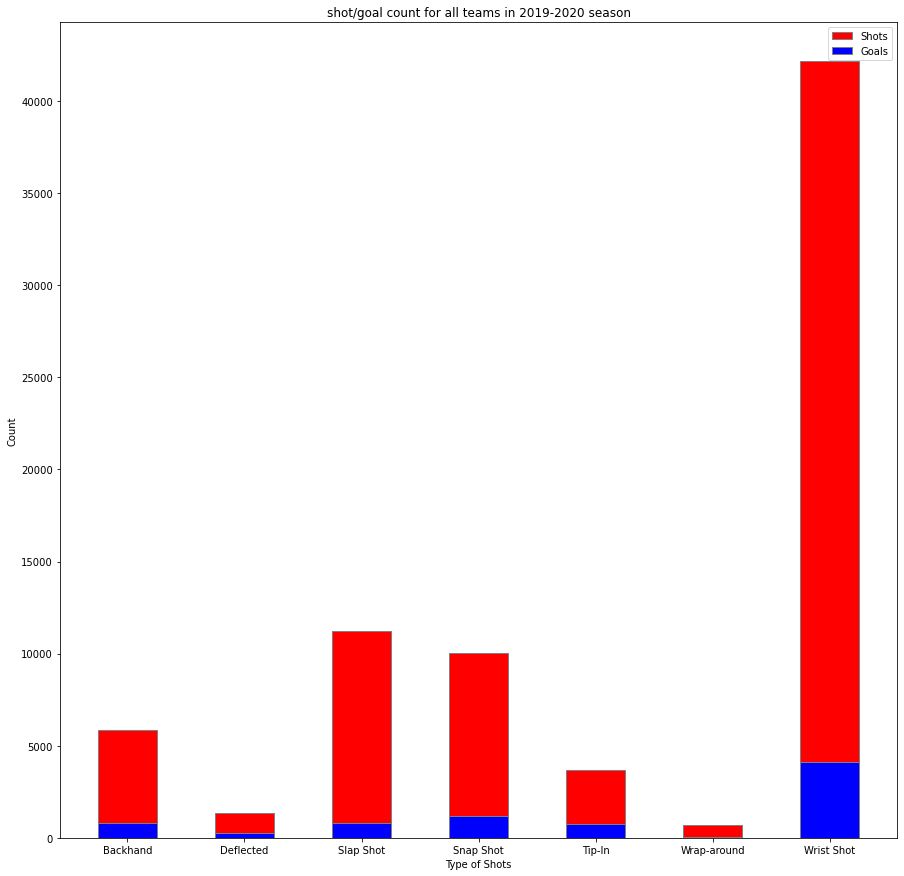

In [213]:
# set width of bar
barWidth = 0.5
fig = plt.subplots(figsize =(15, 15))

shots = np.array(df_plot.shot_count)  #IT, CSE, ECE will be replaced by Hockey Teams
goals = np.array(df_plot.goal_count)
#CSE = [29, 3, 24, 25, 17]

#the values we take are the folloing ones
br1 = np.array(df_plot['result.secondaryType'])
plt.bar(br1, shots, color ='r', width = barWidth,
        edgecolor ='grey', label='Shots')
plt.bar(br1, goals, color ='b', width =barWidth,
        edgecolor ='grey', label='Goals')
plt.xlabel('Type of Shots')
plt.ylabel('Count')
plt.title('shot/goal count for all teams in 2019-2020 season')
plt.legend()

<AxesSubplot:title={'center':'shot/goal count for all teams in 2019-2020 season'}, xlabel='Type of Shots', ylabel='Count'>

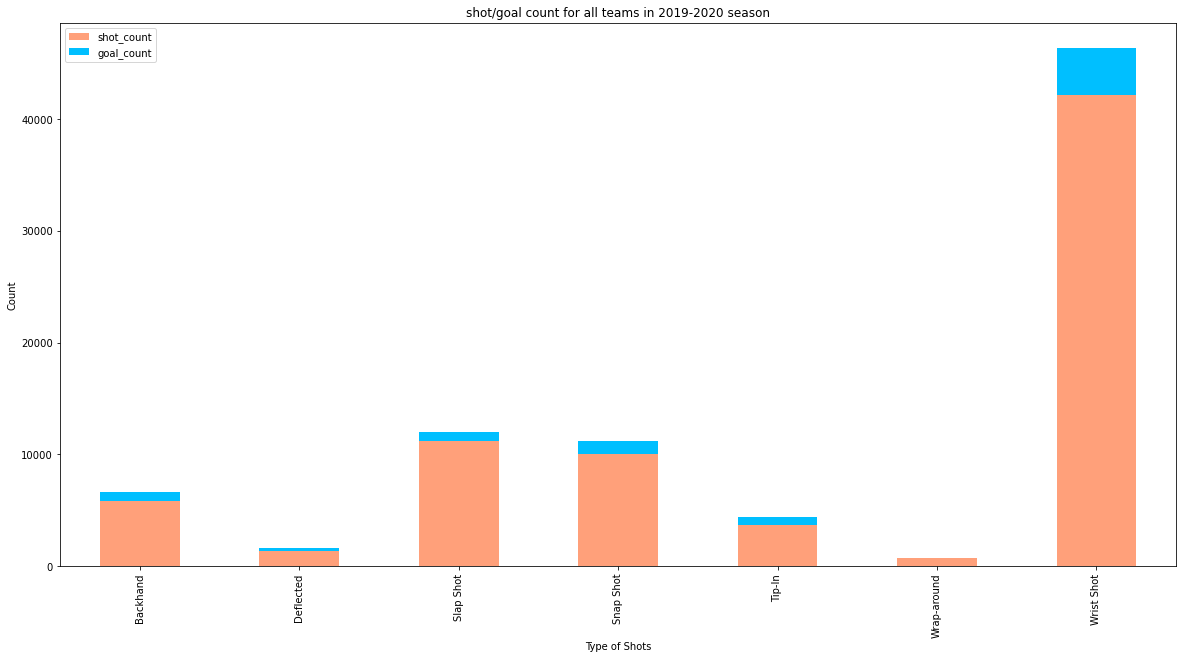

In [214]:
df_plot.plot.bar(x='result.secondaryType', xlabel='Type of Shots', ylabel='Count', stacked=True, color={"shot_count":"lightsalmon", "goal_count":"deepskyblue"}, figsize=(20,10), title="shot/goal count for all teams in 2019-2020 season")

In [216]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
#the values we take are the folloing ones
#plot for backhand sht and goal
shot_wrist = shot_wrist.rename(columns={"count":"shot_count"}) 
goal_wrist = goal_wrist.rename(columns={"count":"goal_count"}) 

wrist_shot = pd.merge(shot_wrist,goal_wrist, how="inner", on="team.name")
wrist_shot.plot.bar(x='team.name', xlabel='Team Name', ylabel='Count',stacked=True, color={"shot_count":"pink", "goal_count":"violet"}, figsize=(20,10), title="Wrist shot/goal count per teams in 2019-2020 season")

NameError: name 'shot_wrist' is not defined

In [217]:
# Try to take the coordindates at create a new "distance" column

In [218]:
from  ift6758.data.data_acquisition import Season
season2019 = Season(2019,"../ift6758/data")
df = season2019.clean_data()
df.head()

File already Exists, loading from ../ift6758/data/PICKLE//2019_clean.pkl


,result.event,gamePk,team.name,about.period,about.periodTime,about.periodType,about.periodTimeRemaining,coordinates.x,coordinates.y,result.secondaryType,result.emptyNet,result.strength.name,shooter,goalie
0,Shot,2019010001,Vegas Golden Knights,1,00:52,REGULAR,19:08,-34.0,19.0,Wrist Shot,NaN,NaN,Reilly Smith,Adin Hill
1,Shot,2019010001,Arizona Coyotes,1,01:12,REGULAR,18:48,67.0,-15.0,Snap Shot,NaN,NaN,Robbie Russo,Malcolm Subban
2,Shot,2019010001,Vegas Golden Knights,1,01:46,REGULAR,18:14,-36.0,32.0,Snap Shot,NaN,NaN,Zach Whitecloud,Adin Hill
3,Goal,2019010001,Arizona Coyotes,1,04:00,REGULAR,16:00,42.0,-19.0,Snap Shot,False,Even,Ilya Lyubushkin,Malcolm Subban
4,Goal,2019010001,Vegas Golden Knights,1,04:39,REGULAR,15:21,-71.0,-3.0,Wrist Shot,False,Even,Max Pacioretty,Adin Hill


In [224]:
df_dist = df[['result.event','coordinates.x','coordinates.y']].dropna()
df_dist

,result.event,coordinates.x,coordinates.y
0,Shot,-34.0,19.0
1,Shot,67.0,-15.0
2,Shot,-36.0,32.0
3,Goal,42.0,-19.0
4,Goal,-71.0,-3.0
...,...,...,...
83052,Goal,-74.0,-11.0
83053,Shot,-69.0,4.0
83054,Shot,-84.0,-10.0
83055,Goal,-74.0,-10.0


In [225]:
import numpy as np
def distance_function(x,y):
    return np.sqrt((np.abs(x)-89)**2+np.abs(y)**2)

In [226]:
df_d = distance_function(df_dist['coordinates.x'], df_dist['coordinates.y']) 

In [227]:
df_dist['distance'] = pd.Series(df_d)
df_dist

,result.event,coordinates.x,coordinates.y,distance
0,Shot,-34.0,19.0,58.189346
1,Shot,67.0,-15.0,26.627054
2,Shot,-36.0,32.0,61.911227
3,Goal,42.0,-19.0,50.695167
4,Goal,-71.0,-3.0,18.248288
...,...,...,...,...
83052,Goal,-74.0,-11.0,18.601075
83053,Shot,-69.0,4.0,20.396078
83054,Shot,-84.0,-10.0,11.180340
83055,Goal,-74.0,-10.0,18.027756


In [228]:
df_dist.describe()

,coordinates.x,coordinates.y,distance
count,82987.000000,82987.000000,82987.000000
mean,-0.637389,-0.078362,34.387987
std,63.004235,18.969914,19.318757
min,-99.000000,-42.000000,1.414214
25%,-64.000000,-14.000000,17.117243
50%,-6.000000,0.000000,32.802439
75%,62.000000,13.000000,49.517674
max,99.000000,42.000000,97.575612


In [229]:
df1 = df_dist[df_dist.distance<10]
df_dist[ (df_dist.distance >=10) & (df_dist.distance <20)]

df1['count'] = df1['result.event']
df1 = df1[['result.event','count']]
df1= df1.groupby(['result.event'], as_index=False ).count()
df1


C:\Users\callr\AppData\Local\Temp/ipykernel_14056/1400911453.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['count'] = df1['result.event']


,result.event,count
0,Goal,1644
1,Shot,6123


In [230]:
proba_list = []
for i in range (0,90 ,10):
    j = i+10
    df_temp = df_dist[ (df_dist.distance >=i) & (df_dist.distance <j)]
    df_temp['count'] = df_temp['result.event']
    df_temp = df_temp[['result.event','count']]
    df_temp= df_temp.groupby(['result.event'], as_index=False ).count()
    proba_list.append(df_temp._get_value(0,'count') / (df_temp._get_value(0,'count') + df_temp._get_value(1,'count')))
    

C:\Users\callr\AppData\Local\Temp/ipykernel_14056/1907006107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['count'] = df_temp['result.event']


In [231]:
proba_list

[0.21166473541908074,
 0.1664861612515042,
 0.11850835049187829,
 0.07125585612815476,
 0.04173650687227623,
 0.028069338422391857,
 0.025098814229249013,
 0.02907488986784141,
 0.027515047291487533]

## Here we generate the probability list for the 3 seasons

In [1]:
from ift6758.visualizations.simple_visualization import Utilities 
from ift6758.data.data_acquisition import Season
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json 

In [2]:
util = Utilities()
season2018 = Season(2018,"../ift6758/data") #2018-2019
season2019 = Season(2019,"../ift6758/data")
season2020 = Season(2020,"../ift6758/data")

df_2018 = season2018.clean_data()
df_2019 = season2019.clean_data()
df_2020 = season2020.clean_data()

File already Exists, loading from ../ift6758/data/PICKLE//2018_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2019_clean.pkl
File already Exists, loading from ../ift6758/data/PICKLE//2020_clean.pkl


In [3]:
df_dist1 = df_2018[['result.event','coordinates.x','coordinates.y']].copy().dropna()
df_dist2 = df_2019[['result.event','coordinates.x','coordinates.y']].copy().dropna()
df_dist3 = df_2020[['result.event','coordinates.x','coordinates.y']].copy().dropna()

df_dist1['distance'] = util.rink_distance(df_dist1['coordinates.x'], df_dist1['coordinates.y'])
df_dist2['distance'] = util.rink_distance(df_dist2['coordinates.x'], df_dist2['coordinates.y'])
df_dist3['distance'] = util.rink_distance(df_dist3['coordinates.x'], df_dist3['coordinates.y'])

In [4]:
prob_list1 = util.get_probabilities(df_dist1)
prob_list2 = util.get_probabilities(df_dist2)
prob_list3 = util.get_probabilities(df_dist3)
distance = [(i, i+10) for i in range (0,100 ,10)]

print(prob_list1)
print(prob_list2)
print(prob_list3)
print(distance)

[0.19343065693430658, 0.1628498727735369, 0.12063056888279644, 0.07462093623783354, 0.04462673088500903, 0.03262955854126679, 0.025713707228183842, 0.03400309119010819, 0.03177124702144559, 0.04221635883905013]
[0.21166473541908074, 0.1664861612515042, 0.11850835049187829, 0.07125585612815476, 0.04173650687227623, 0.028069338422391857, 0.025098814229249013, 0.02907488986784141, 0.027515047291487533, 0.05167958656330749]
[0.20918704560475876, 0.16163755073230987, 0.11690977849810913, 0.07545570156846121, 0.04049882701568095, 0.030348315898379125, 0.025015634771732333, 0.037463976945244955, 0.0535475234270415, 0.02727272727272727]
[(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)]


d:\udem mila\ift 6758\project\ift6758-project-main\ift6758\visualizations\simple_visualization.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['count'] = df_temp['result.event']


<AxesSubplot:title={'center':'Probability of a shot being a goal wrt Distance'}, xlabel='distance', ylabel='Probability'>

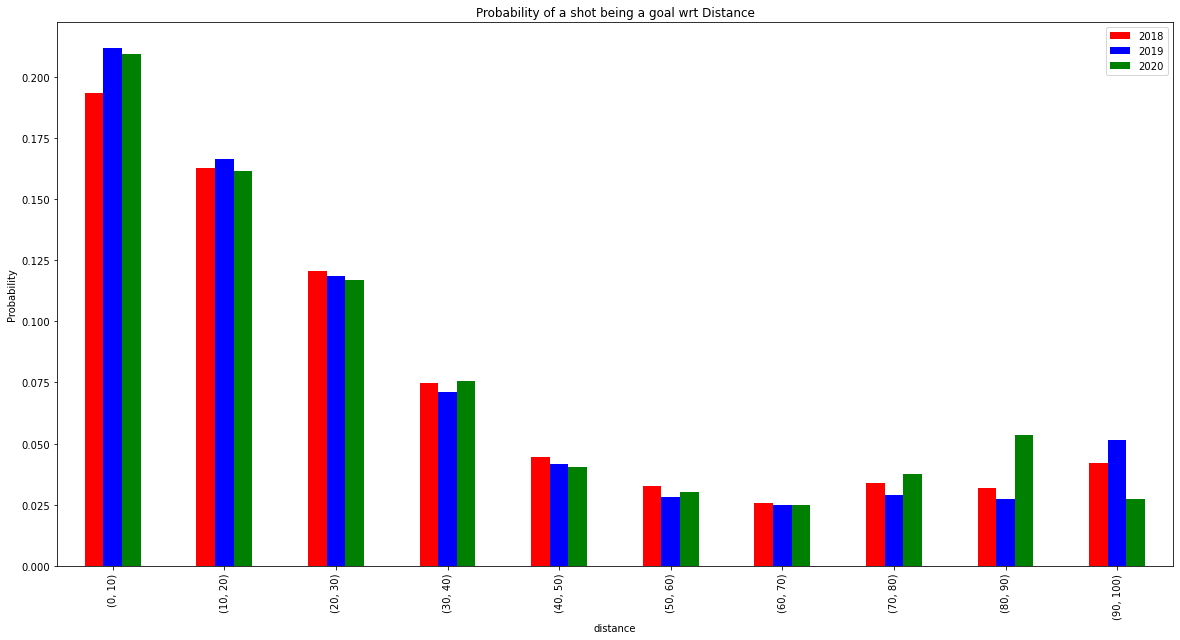

In [5]:
d = pd.Series(distance, name= 'distance')
p1 = pd.Series(prob_list1, name= '2018')
p2 = pd.Series(prob_list2, name= '2019')
p3=pd.Series(prob_list3, name= '2020')

dfn = pd.concat([d, p1, p2, p3], axis=1)
dfn.head()

dfn.plot.bar(x='distance', ylabel='Probability',stacked=False,color={"2018":"red", "2019":"blue", "2020":"green"}, figsize=(20,10), title="Probability of a shot being a goal wrt Distance")

In [6]:
df_dist1 = df_2019[['result.event','coordinates.x','coordinates.y', 'result.secondaryType']].copy().dropna()
df_dist1['distance'] = util.rink_distance(df_dist1['coordinates.x'], df_dist1['coordinates.y'])
df_dist1

,result.event,coordinates.x,coordinates.y,result.secondaryType,distance
0,Shot,-34.0,19.0,Wrist Shot,58.189346
1,Shot,67.0,-15.0,Snap Shot,26.627054
2,Shot,-36.0,32.0,Snap Shot,61.911227
3,Goal,42.0,-19.0,Snap Shot,50.695167
4,Goal,-71.0,-3.0,Wrist Shot,18.248288
...,...,...,...,...,...
83052,Goal,-74.0,-11.0,Wrist Shot,18.601075
83053,Shot,-69.0,4.0,Backhand,20.396078
83054,Shot,-84.0,-10.0,Wrist Shot,11.180340
83055,Goal,-74.0,-10.0,Wrist Shot,18.027756


In [7]:
grouped = df_dist1.groupby(df_dist1['result.secondaryType'])
df_wrist = grouped.get_group("Wrist Shot")
df_snap = grouped.get_group("Snap Shot")
df_backhand = grouped.get_group("Backhand")
df_slap = grouped.get_group("Slap Shot")
df_tip = grouped.get_group("Tip-In")
df_wrap = grouped.get_group("Wrap-around")
df_deflected = grouped.get_group("Deflected")


<AxesSubplot:title={'center':'Probability of a shot being a goal wrt Distance'}, xlabel='distance', ylabel='Probability'>

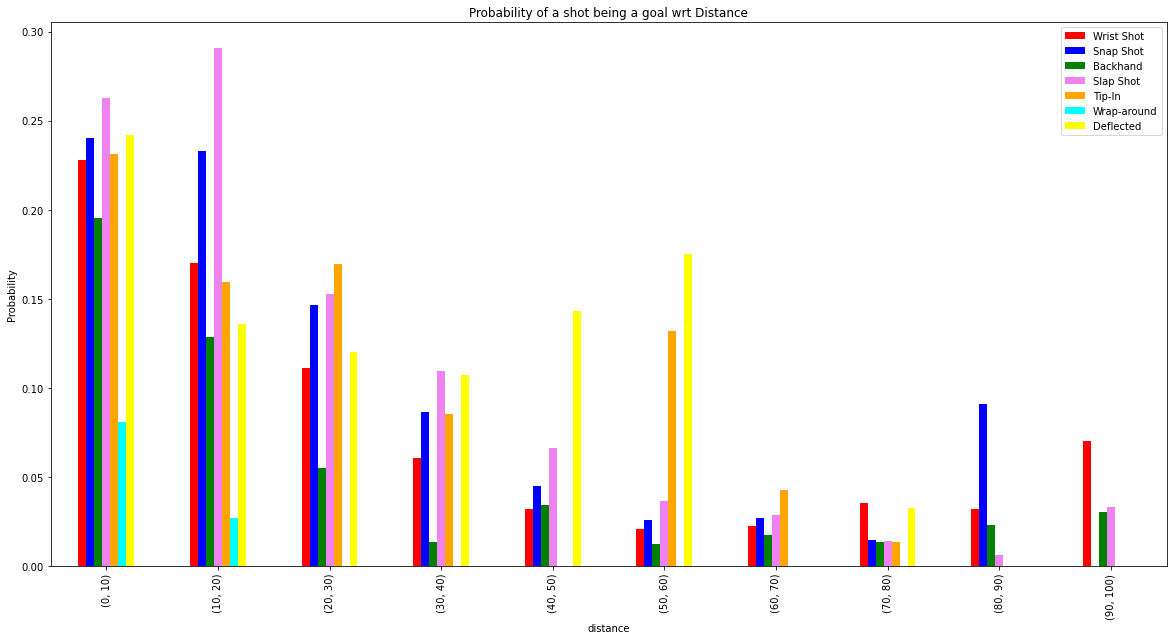

In [9]:
prob_1 = util.get_probabilities(df_wrist)
prob_2 = util.get_probabilities(df_snap)
prob_3 = util.get_probabilities(df_backhand)
prob_4 = util.get_probabilities(df_slap)
prob_5 = util.get_probabilities(df_tip)
prob_6 = util.get_probabilities(df_wrap)
prob_7 = util.get_probabilities(df_deflected)
distance = [(i, i+10) for i in range (0,100 ,10)]

d = pd.Series(distance, name= 'distance')
p1 = pd.Series(prob_1, name= 'Wrist Shot')
p2 = pd.Series(prob_2, name= 'Snap Shot')
p3 = pd.Series(prob_3, name= 'Backhand')
p4 = pd.Series(prob_4, name= 'Slap Shot')
p5 = pd.Series(prob_5, name= 'Tip-In')
p6 = pd.Series(prob_6, name= 'Wrap-around')
p7 = pd.Series(prob_7, name= 'Deflected')

dfn = pd.concat([d, p1, p2, p3, p4, p5, p6, p7], axis=1)
dfn.head()

dfn.plot.bar(x='distance', ylabel='Probability',stacked=False,color={"Wrist Shot":"red", "Snap Shot":"blue", "Backhand":"green", "Slap Shot":"violet", "Tip-In":"orange", "Wrap-around":"aqua", "Deflected":"yellow"}, figsize=(20,10), title="Probability of a shot being a goal wrt Distance")